In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv3D, Conv2D, MaxPooling3D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import pickle
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split


## Load CORe Embeddings

### Load in CORe Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_embeddings_30k.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_labels_30k.npy')


### Train/Test Split

In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42, stratify=labels)
del embeddings
del labels


## CNN Models

In [7]:
# Specify model hyperparameters.
embed_dim = 5
num_filters = [3, 5]
kernel_sizes = [3, 5]
dense_layer_dims = [10]
dropout_rate = 0.7
num_classes = 4

In [8]:
inputs = tf.keras.layers.Input(shape=(264,768))
conv_layers_for_all_kernel_sizes = []
for kernel_size, filters in zip(kernel_sizes, num_filters):
    conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
    conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
    conv_layers_for_all_kernel_sizes.append(conv_layer)

h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1)

h = keras.layers.Dropout(rate=dropout_rate)(h)

for i in dense_layer_dims:
    h=keras.layers.Dense(i, activation='relu')(h)

prediction = keras.layers.Dense(num_classes, activation='softmax')(h)

model = keras.Model(inputs=inputs, outputs=prediction)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

In [9]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 264, 768)]   0           []                               
                                                                                                  
 conv1d_1 (Conv1D)              (None, 262, 3)       6915        ['input_2[0][0]']                
                                                                                                  
 conv1d_2 (Conv1D)              (None, 260, 5)       19205       ['input_2[0][0]']                
                                                                                                  
 global_max_pooling1d_1 (Global  (None, 3)           0           ['conv1d_1[0][0]']               
 MaxPooling1D)                                                                              

In [10]:
train = model.fit(train_X, train_y, epochs=10, validation_split=0.2)


Epoch 1/10
600/600 [==============================] - 31s 48ms/step - loss: 1.3916 - sparse_categorical_accuracy: 0.2481 - val_loss: 1.3863 - val_sparse_categorical_accuracy: 0.2483
Epoch 2/10
600/600 [==============================] - 22s 37ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2444 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2483
Epoch 3/10
600/600 [==============================] - 22s 37ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2487 - val_loss: 1.3865 - val_sparse_categorical_accuracy: 0.2477
Epoch 4/10
600/600 [==============================] - 23s 38ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2459 - val_loss: 1.3866 - val_sparse_categorical_accuracy: 0.2483
Epoch 5/10
600/600 [==============================] - 23s 38ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2491 - val_loss: 1.3865 - val_sparse_categorical_accuracy: 0.2483
Epoch 6/10
600/600 [==============================] - 23s 38ms/step - loss: 1.3864 - spars

In [11]:
model.evaluate(test_X, test_y)

188/188 [==============================] - 2s 12ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2505


[1.386290192604065, 0.25049999356269836]

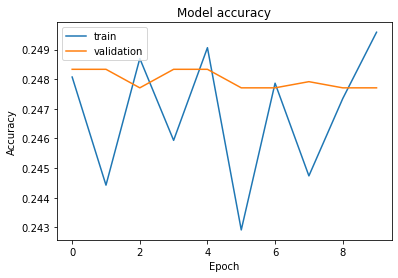

In [12]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

---

In [4]:
# Specify model hyperparameters.
embed_dim = 5
num_filters = [2, 10, 20]
kernel_sizes = [3, 4, 5]
dense_layer_dims = [10, 4]
dropout_rate = 0.7
num_classes = 4

In [5]:
inputs = tf.keras.layers.Input(shape=(264,768))
conv_layers_for_all_kernel_sizes = []
for kernel_size, filters in zip(kernel_sizes, num_filters):
    conv_layer = keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
    conv_layer = keras.layers.GlobalMaxPooling1D()(conv_layer)
    conv_layers_for_all_kernel_sizes.append(conv_layer)

h = keras.layers.concatenate(conv_layers_for_all_kernel_sizes, axis=1)

h = keras.layers.Dropout(rate=dropout_rate)(h)

for i in dense_layer_dims:
    h=keras.layers.Dense(i, activation='relu')(h)

prediction = keras.layers.Dense(num_classes, activation='softmax')(h)

model = keras.Model(inputs=inputs, outputs=prediction)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

In [6]:
train = model.fit(train_X, train_y, epochs=30, validation_split=0.2)


Epoch 1/30
600/600 [==============================] - 44s 71ms/step - loss: 1.3904 - sparse_categorical_accuracy: 0.2495 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2477
Epoch 2/30
600/600 [==============================] - 37s 61ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2500 - val_loss: 1.3865 - val_sparse_categorical_accuracy: 0.2477
Epoch 3/30
600/600 [==============================] - 37s 62ms/step - loss: 1.3863 - sparse_categorical_accuracy: 0.2516 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2483
Epoch 4/30
600/600 [==============================] - 37s 62ms/step - loss: 1.3864 - sparse_categorical_accuracy: 0.2528 - val_loss: 1.3865 - val_sparse_categorical_accuracy: 0.2479
Epoch 5/30
600/600 [==============================] - 37s 62ms/step - loss: 1.3866 - sparse_categorical_accuracy: 0.2503 - val_loss: 1.3864 - val_sparse_categorical_accuracy: 0.2479
Epoch 6/30
600/600 [==============================] - 37s 62ms/step - loss: 1.3864 - spars

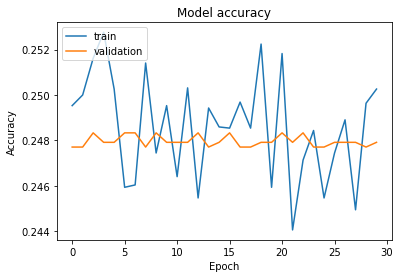

In [7]:
plt.plot(train.history['sparse_categorical_accuracy'])
plt.plot(train.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()